## Zomato Data Analysis Project

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### create the data frame

In [2]:
df=pd.read_csv('Zomato data .csv')

In [3]:
df.head(3)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet


### Data preprocessing

In [4]:
def handleRate(value):
    value = str(value).split('/')
    value=value[0];
    return float(value)
df['rate']=df['rate'].apply(handleRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


### Type of Resturant

Text(0.5, 0, 'Type of Resturant')

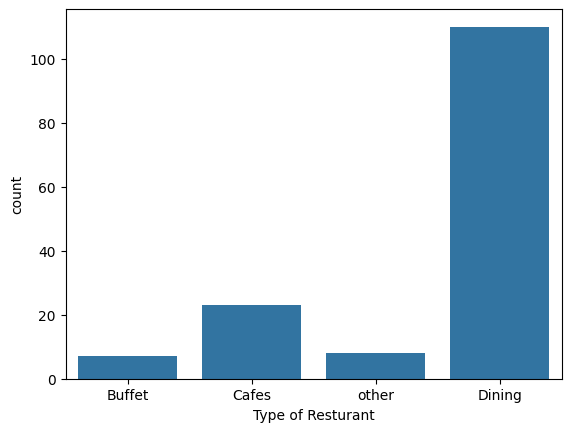

In [6]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of Resturant")

### Conclusion: majority of the Restruant falls in dining Category

In [7]:
df.head(3)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet


Text(0, 0.5, 'Votes ')

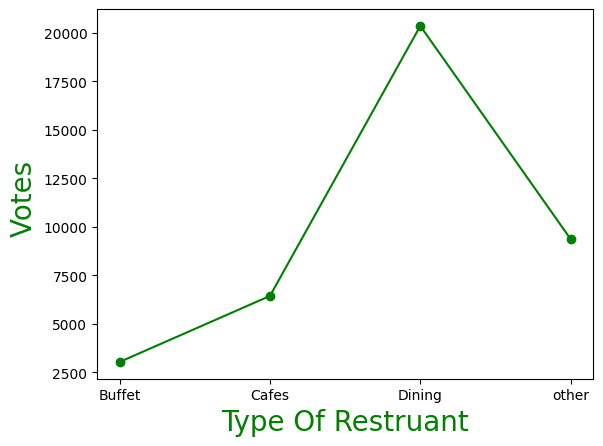

In [8]:
grouped_data=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,c="green",marker="o")
plt.xlabel("Type Of Restruant",c="green",size=20)
plt.ylabel("Votes ",c="green",size=20)

### Conclusion : Dinig Restruants Received highest votes

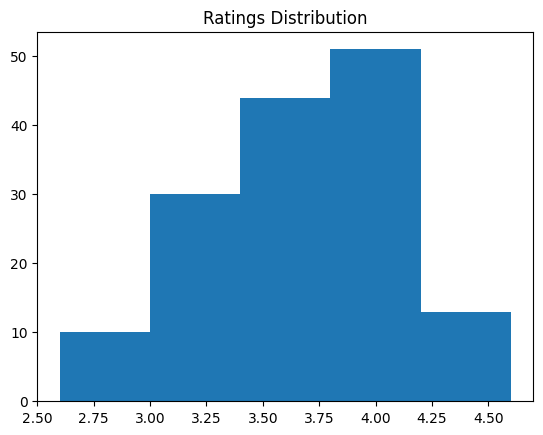

In [9]:
plt.hist(df['rate'],bins=5)
plt.title("Ratings Distribution")
plt.show()

### Conclusion: The majority Restruants receieved ratings from 3.5 to 4

## Average order spending by couples 

In [10]:
df.head(3)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

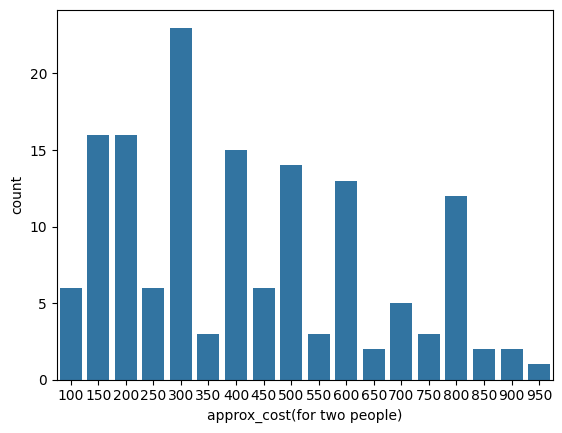

In [11]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

### Conclusion : The majority of Couples prefer Restruants  with anpproximate cost of 300 rupees

### which modes receiveds maximum rating

In [12]:
df.head(3)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

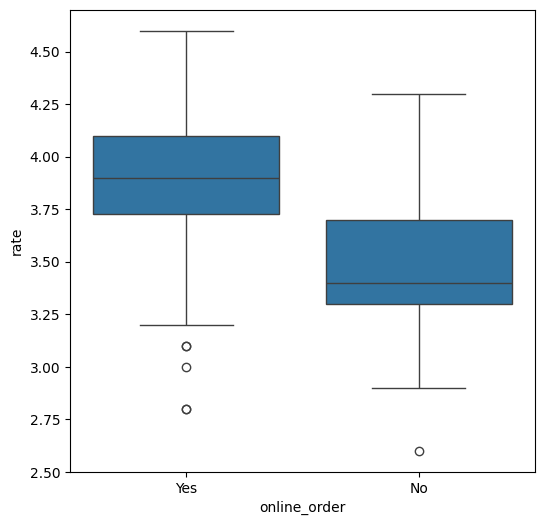

In [13]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df)

### Conclusion : Offline order received lower ratings in comparsion in order to online order

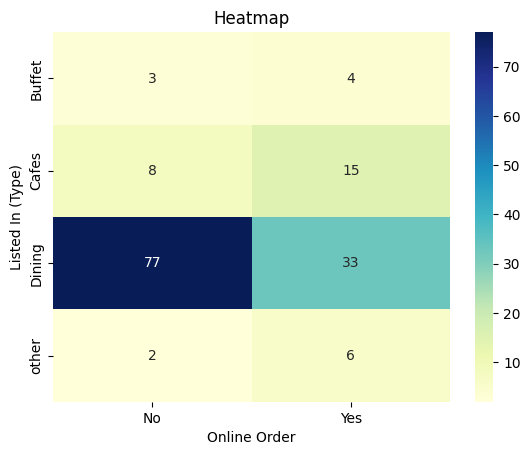

In [14]:
pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

### Conclusion:  Dining restruantsprimarily accept offline orders,whereas cafes primarily received online orders,this suggests that prefer orders in a person at restraunts,but online ordering at cafes.